In [1]:
import numpy as np
import pandas as pd
from os.path import exists

import seaborn as sns
import helper_visualize as help_vis
import helper_data_load as help_load

In [2]:
folder_base_path = "../../Data/Results/"
disc_folder = "class_disc_preds_valeria/"
vali_folder = "class_vali_preds_valeria/"
predictions_folder = "preds/"
c_idxs_folder = "c_idxs/"
disc_file_base = "cv_preds_"
vali_file_base = "preds_"
vali_file_part2 = "on_vali_CHUM.csv"

In [3]:
model_list = ["BaggingClassifier(random_state=42)","DecisionTreeClassifier(random_state=42)",
 "ensemble_LogisticRegressionCV(random_state=42)", "GradientBoostingClassifier(random_state=42)",
  "KNeighborsClassifier()", "LogisticRegressionCV(random_state=42)",
   "RandomForestClassifier(random_state=42)", "SVC()"]
feat_sel_meth_list = [ "mim_class", "f_classif", "mrmr5"] # "corr-1","randFor_feat_sel", "mrmr5",

In [7]:
metric = "c"
metric_df = pd.DataFrame(index=model_list, columns=feat_sel_meth_list)
for model_temp in model_list:
    for feat_sel_temp in feat_sel_meth_list:
        corr_meth = -1
        if feat_sel_temp in [ "mrmr5"]:
            file_path = folder_base_path+disc_folder+predictions_folder+disc_file_base+model_temp+"_"+feat_sel_temp+".csv"
        else:
            file_path = folder_base_path+disc_folder+predictions_folder+disc_file_base+model_temp+"_"+feat_sel_temp+str(corr_meth)+".csv"
            print(file_path)
        metric_df = help_vis.eval_disc(file_path=file_path, model_temp=model_temp, feat_sel_temp=feat_sel_temp, metric_df=metric_df, metric=metric)

metric_df

../../Data/Results/class_disc_preds_valeria/preds/cv_preds_BaggingClassifier(random_state=42)_mim_class-1.csv
../../Data/Results/class_disc_preds_valeria/preds/cv_preds_BaggingClassifier(random_state=42)_f_classif-1.csv
../../Data/Results/class_disc_preds_valeria/preds/cv_preds_DecisionTreeClassifier(random_state=42)_mim_class-1.csv
../../Data/Results/class_disc_preds_valeria/preds/cv_preds_DecisionTreeClassifier(random_state=42)_f_classif-1.csv
../../Data/Results/class_disc_preds_valeria/preds/cv_preds_ensemble_LogisticRegressionCV(random_state=42)_mim_class-1.csv
../../Data/Results/class_disc_preds_valeria/preds/cv_preds_ensemble_LogisticRegressionCV(random_state=42)_f_classif-1.csv
../../Data/Results/class_disc_preds_valeria/preds/cv_preds_GradientBoostingClassifier(random_state=42)_mim_class-1.csv
../../Data/Results/class_disc_preds_valeria/preds/cv_preds_GradientBoostingClassifier(random_state=42)_f_classif-1.csv
../../Data/Results/class_disc_preds_valeria/preds/cv_preds_KNeighbor

,mim_class,f_classif,mrmr5
BaggingClassifier(random_state=42),1.000000,1.000000,1.0
DecisionTreeClassifier(random_state=42),1.000000,1.000000,1.0
ensemble_LogisticRegressionCV(random_state=42),1.000000,1.000000,1.0
GradientBoostingClassifier(random_state=42),1.000000,1.000000,1.0
KNeighborsClassifier(),1.000000,0.990741,1.0
LogisticRegressionCV(random_state=42),1.000000,0.990741,1.0
RandomForestClassifier(random_state=42),0.990741,1.000000,1.0
SVC(),1.000000,0.990741,1.0


In [8]:
def rename_heat_map(df):
    ml_names = ["Bagging C.", "Desc. T. C.", "Ensemble LR", "Gradient Boosting C.", "Knn C.", "Logistic R.", "Random Forest C.", "SVC"]
    dict_ml_names = dict(zip(list(df.index), ml_names))

    fs_names = ["MIM C.", "F-Cl.", "MRMR5"]
    dict_fs_names = dict(zip(list(df.columns), fs_names))
    print(dict_fs_names)
    df = df.rename(columns=dict_fs_names)
    df = df.rename(index=dict_ml_names)
    return df
metric_df = rename_heat_map(metric_df)

{'mim_class': 'MIM C.', 'f_classif': 'F-Cl.', 'mrmr5': 'MRMR5'}


Text(0.5, 1.0, 'Discovery IUCPQ - Error c')

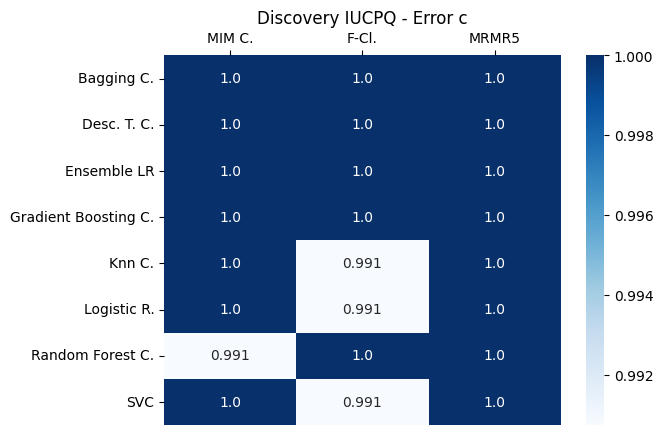

In [9]:
ax = sns.heatmap(metric_df, annot=True, fmt=".3", cmap= sns.color_palette("Blues", as_cmap=True))# , cmap="YlGnBu"
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
ax.set_title("Discovery IUCPQ - Error "+str(metric))

# Validation Set

In [10]:
metric = "c"
vali_metric_df = pd.DataFrame(index=model_list, columns=feat_sel_meth_list)
data_norm_chum, _ = help_load.get_norm_data(local=True, classification=True)
y_vali = data_norm_chum["class_os_days"]
for model_temp in model_list:
    for feat_sel_temp in feat_sel_meth_list:
        corr_meth = -1
        if feat_sel_temp in ["mrmr5"]:
            file_path_vali = folder_base_path+vali_folder+predictions_folder+vali_file_base+feat_sel_temp+vali_file_part2
        else:
            file_path_vali = folder_base_path+vali_folder+predictions_folder+vali_file_base+feat_sel_temp+str(corr_meth)+vali_file_part2
        
        vali_metric_df = help_vis.eval_vali(file_path=file_path_vali, model_temp=model_temp, feat_sel_temp=feat_sel_temp, corr_meth_temp=corr_meth, metric_df=vali_metric_df, metric=metric, y_vali=y_vali)


223 patients with clinical and radiation data for CHUM.
162 patients with clinical and radiation data for IUCPQ.


/Users/iucpq/Documents/IUCPQ/IUCPQ/Predictions/helper_data_load.py:35: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_norm.columns = data_norm.columns.str.replace('.','_')
/Users/iucpq/Documents/IUCPQ/IUCPQ/Predictions/helper_data_load.py:35: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_norm.columns = data_norm.columns.str.replace('.','_')
/Users/iucpq/Documents/IUCPQ/IUCPQ/Predictions/helper_data_load.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

149 patients with clinical and radiation data for CHUM and classification.


/Users/iucpq/Documents/IUCPQ/IUCPQ/Predictions/helper_data_load.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.class_os_days != 2] = 1
/Users/iucpq/Documents/IUCPQ/IUCPQ/Predictions/helper_data_load.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.class_os_days == "nan"] = np.nan


108 patients with clinical and radiation data for IUCPQ and classification.


In [11]:
vali_metric_df

,mim_class,f_classif,mrmr5
BaggingClassifier(random_state=42),0.986486,1.0,1.0
DecisionTreeClassifier(random_state=42),0.986486,1.0,1.0
ensemble_LogisticRegressionCV(random_state=42),0.986486,1.0,1.0
GradientBoostingClassifier(random_state=42),0.972973,1.0,1.0
KNeighborsClassifier(),0.986486,1.0,1.0
LogisticRegressionCV(random_state=42),0.986486,1.0,1.0
RandomForestClassifier(random_state=42),0.972973,1.0,1.0
SVC(),0.986486,1.0,1.0


In [12]:
def rename_heat_map(df):
    ml_names = ["Bagging C.", "Desc. T. C.", "Ensemble LR", "Gradient Boosting C.", "Knn C.", "Logistic R.", "Random Forest C.", "SVC"]
    dict_ml_names = dict(zip(list(df.index), ml_names))

    fs_names = ["MIM C.", "F-Cl.", "MRMR5"]    
    dict_fs_names = dict(zip(list(df.columns), fs_names))
    df = df.rename(columns=dict_fs_names)
    df = df.rename(index=dict_ml_names)
    return df
vali_metric_df = rename_heat_map(vali_metric_df)

Text(0.5, 1.0, 'Validation CHUM - Error c')

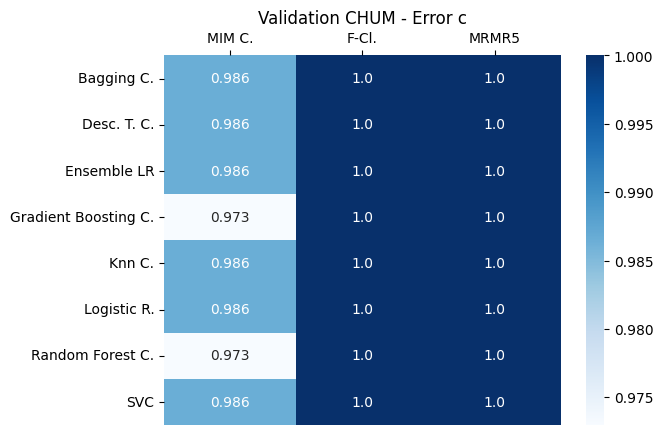

In [13]:
ax = sns.heatmap(vali_metric_df, annot=True, fmt=".3", cmap= sns.color_palette("Blues", as_cmap=True)) # , cmap="YlGnBu"
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
ax.set_title("Validation CHUM - Error "+str(metric))